# NEW SiPM Noise Analysis
## Run 8088

This notebook looks at the noise in the non-zero suppressed run 8088. It looks at the dark spetra and also analyzes the average noise across the run, across waveforms, for each SiPM. 

It also includes analysis with the average noise found using the entire run with specific window sizes, to see the window size vs noise relation.

In [1]:
import json
import random
import numpy as np
import matplotlib.pyplot as plt

import invisible_cities.database.load_db as db

import sqlite3
from glob import glob

# Dark Spetra

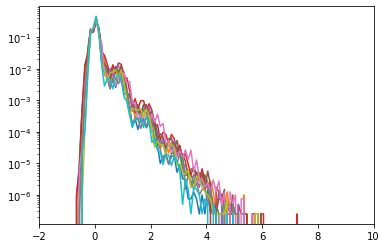

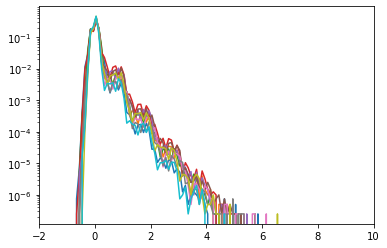

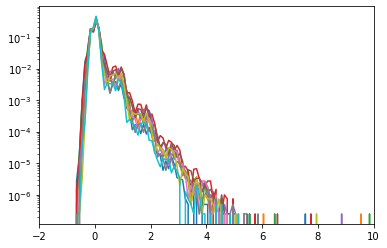

In [8]:
runs = [6500, 7000, 8088]
for run in runs:
    probs, xbins, baselines = db.SiPMNoise('new', run)
    for i in range(0,10):
        plt.plot(xbins, probs[i])
        plt.xlim(-2, 10)
    plt.yscale('log')
    plt.show()

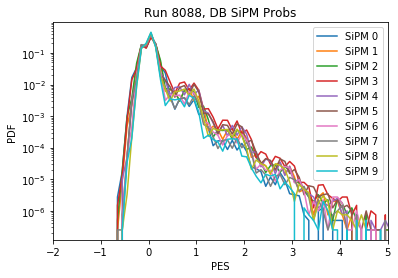

In [9]:
run = 8088
nsipms = 10
probs, xbins, baselines = db.SiPMNoise('new', run)
for i in range(0,nsipms):
    plt.plot(xbins, probs[i], label='SiPM '+str(i))
plt.xlim(-2, 5)
plt.xlabel('PES')
plt.ylabel('PDF')
plt.title('Run '+str(run)+', DB SiPM Probs')
plt.legend()
plt.yscale('log')
plt.show()

## Individual Thresholding

In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

SiPM 0
peak  0


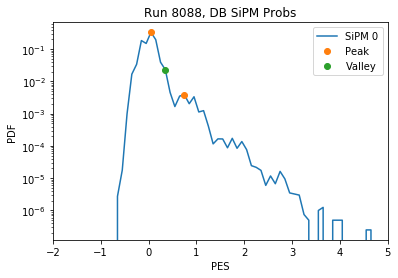

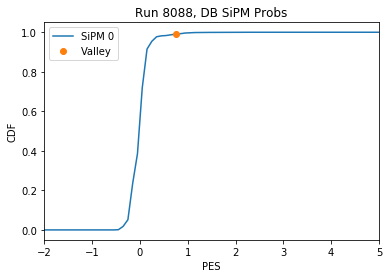

Threshold = 1 -> CDF = 0.9907152499999999
SiPM 673
peak  0
peak  1


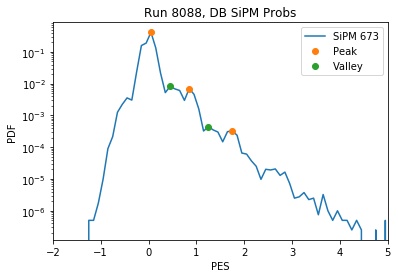

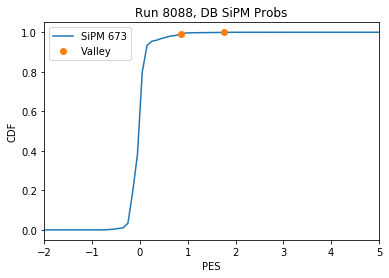

Threshold = 1 -> CDF = 0.9910005999999999
Threshold = 2 -> CDF = 0.9994428499999997
SiPM 400
peak  0


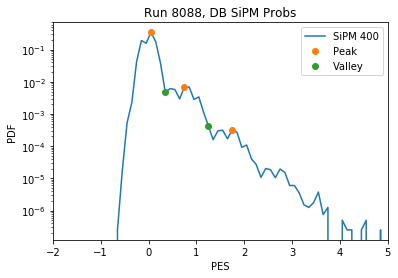

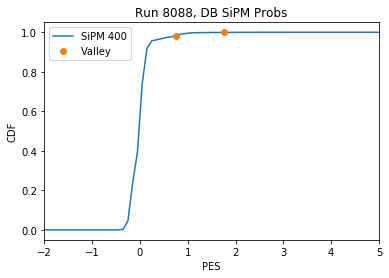

Threshold = 1 -> CDF = 0.9834309999999998
Threshold = 2 -> CDF = 0.9993412499999997


In [11]:
nsipms = [0, 673, 400] #3
for n in nsipms:
    print('SiPM '+str(n))
    peaks_ind, _ = find_peaks(probs[n], height=None, threshold=None, distance=5, prominence=1e-4, width=None, wlen=None, rel_height=0.5, plateau_size=None)

    # Check that max of spectra is same as first peak
    max_ind = np.argmax(probs[n])
    for peak in range(len(peaks_ind)):
        print('peak ', peak)
        if max_ind == peaks_ind[peak]:
            peaks_ind = peaks_ind[peak:]
            break
    
    peaks_x = xbins[peaks_ind]
    peaks = probs[n][peaks_ind]
    valleys_ind = peaks_ind[:-1] + np.diff(peaks_ind)//2
    valleys_x = xbins[valleys_ind]
    valleys = probs[n][valleys_ind]

    
    plt.plot(xbins, probs[n], label='SiPM '+str(n))
    plt.plot(peaks_x, peaks, 'o', label='Peak')
    plt.plot(valleys_x, valleys, 'o', label='Valley')
    plt.xlim(-2, 5)
    plt.xlabel('PES')
    plt.ylabel('PDF')
    plt.title('Run '+str(run)+', DB SiPM Probs')
    plt.legend()
    plt.yscale('log')
    plt.show()
    
    cdf = np.cumsum(probs[n])
    plt.plot(xbins, cdf, label='SiPM '+str(n))
    plt.plot(xbins[peaks_ind[1:]], cdf[peaks_ind[1:]], 'o', label='Valley')
    plt.xlim(-2, 5)
    plt.xlabel('PES')
    plt.ylabel('CDF')
    plt.title('Run '+str(run)+', DB SiPM Probs')
    plt.legend()
    #plt.yscale('log')
    plt.show()
    
    [print('Threshold = '+str(i+1)+' -> CDF = '+str(cdf[peaks_ind[i+1]])) for i in range(len(peaks_ind[1:]))]
    

In [30]:
mean_probs = np.mean(probs, axis=0)
sum_probs = np.sum(probs, axis=0)

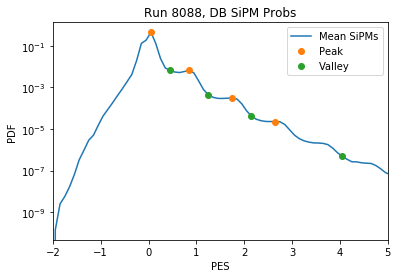

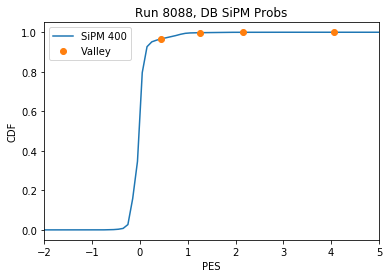

Threshold = 1 -> CDF = 0.9895979328487363
Threshold = 2 -> CDF = 0.9992492119851204
Threshold = 3 -> CDF = 0.9999258678214487
Threshold = 4 -> CDF = 0.9999994332516152
Threshold = 5 -> CDF = 0.999999649490455
Threshold = 6 -> CDF = 0.9999996859022854
Threshold = 7 -> CDF = 0.9999997383576424
Threshold = 8 -> CDF = 0.9999997771411246
Threshold = 9 -> CDF = 0.9999998058799638
Threshold = 10 -> CDF = 0.9999998206679103
Threshold = 11 -> CDF = 0.9999998521969283
Threshold = 12 -> CDF = 0.9999998831679103
Threshold = 13 -> CDF = 0.9999998972583126
Threshold = 14 -> CDF = 0.9999999035362143
Threshold = 15 -> CDF = 0.9999999379949194
Threshold = 16 -> CDF = 0.999999952085321
Threshold = 17 -> CDF = 0.9999999561310798
Threshold = 18 -> CDF = 0.999999967570812


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [32]:
peaks_ind, _ = find_peaks(mean_probs, height=None, threshold=None, distance=3, prominence=1e-9, width=None, wlen=None, rel_height=0.5, plateau_size=None)
peaks_x = xbins[peaks_ind]
peaks = mean_probs[peaks_ind]
valleys_ind = peaks_ind[:-1] + np.diff(peaks_ind)//2
valleys_x = xbins[valleys_ind]
valleys = mean_probs[valleys_ind]

plt.plot(xbins, mean_probs, label='Mean SiPMs')
plt.plot(peaks_x, peaks, 'o', label='Peak')
plt.plot(valleys_x, valleys, 'o', label='Valley')
plt.xlim(-2, 5)
plt.xlabel('PES')
plt.ylabel('PDF')
plt.title('Run '+str(run)+', DB SiPM Probs')
plt.legend()
plt.yscale('log')
plt.show()

cdf = np.cumsum(mean_probs)
plt.plot(xbins, cdf, label='SiPM '+str(n))
plt.plot(xbins[valleys_ind], cdf[valleys_ind], 'o', label='Valley')
plt.xlim(-2, 5)
plt.xlabel('PES')
plt.ylabel('CDF')
plt.title('Run '+str(run)+', DB SiPM Probs')
plt.legend()
#plt.yscale('log')
plt.show()

[print('Threshold = '+str(i+1)+' -> CDF = '+str(cdf[peaks_ind[i+1]])) for i in range(len(peaks_ind[1:]))]


In [12]:
cdf = np.cumsum(probs, axis=1)

In [13]:
# Get first valley for every sipm
valleys_cdf = []
nsipms = 1792
cdf = np.cumsum(probs, axis=1)
for n in range(nsipms):
    
    if n%100 == 0:
        print('SiPM '+str(n))
    
    # Find peaks
    peaks_ind, _ = find_peaks(probs[n], height=None, threshold=None, distance=5, prominence=1e-5, width=None, wlen=None, rel_height=0.5, plateau_size=None)
    
    # Check that max of spectra is same as first peak
    max_ind = np.argmax(probs[n])
    for peak in range(len(peaks_ind)):
        if max_ind == peaks_ind[peak]:
            peaks_ind = peaks_ind[peak:]
            break
    if len(peaks_ind) < 2:
        continue
    
    # Grab Valley position
    valleys_ind = peaks_ind[:-1] + np.diff(peaks_ind)//2
    
    valleys_cdf.append(cdf[n][valleys_ind[0]])

SiPM 0
SiPM 100
SiPM 200
SiPM 300
SiPM 400
SiPM 500
SiPM 600
SiPM 700
SiPM 800
SiPM 900
SiPM 1000
SiPM 1100
SiPM 1200
SiPM 1300
SiPM 1400
SiPM 1500
SiPM 1600
SiPM 1700


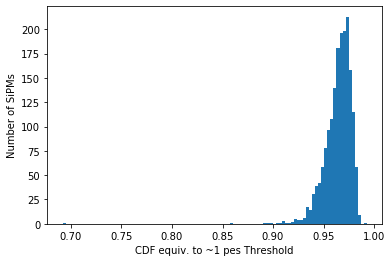

In [14]:
plt.hist(valleys_cdf, bins=100)
plt.xlabel('CDF equiv. to ~1 pes Threshold')
plt.ylabel('Number of SiPMs')
plt.show()

In [15]:
cdf_hist, cdf_bin_edges = np.histogram(valleys_cdf, bins=100)

In [16]:
(cdf_bin_edges[np.argmax(cdf_hist)] + cdf_bin_edges[np.argmax(cdf_hist)+1]) / 2.

0.9733372702499999

# Noise from waveforms

In [37]:
# noise was found by taking a given window in the outer region of the raw waveforms and 
# summing all the SiPMs in that window. This should be just noise as it is far from
# the S2 window. 
noise = np.array([619, 1239, 1859, 2479])
noise_thresh5 = np.array([428.9, 857.8, 1286.8, 1715.7])
window = np.array([5, 10,15,20])

Text(0.5, 1.0, 'Signal from Outer region')

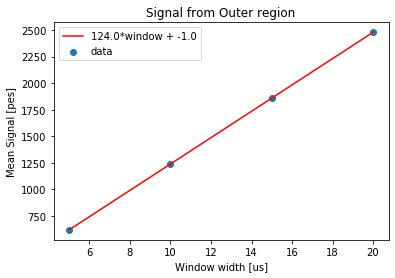

In [43]:
a, b = np.polyfit(window, noise, 1)
plt.scatter(window, noise, label='data')
plt.plot(window, a*window+b, color='r',label="{:#.4g}*window + {:#.2}".format(a,b))
plt.legend()
plt.xlabel('Window width [us]')
plt.ylabel('Mean Signal [pes]')
plt.title('Signal from Outer region')

In [38]:
a, b

(123.99999999999997, -0.999999999998977)

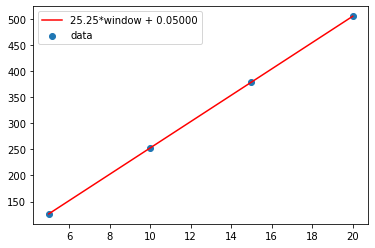

In [45]:
# This noise was found using zero suppressed waveforms
zs_noise = np.array([126.3, 252.6, 378.9, 505.1])

zs_a, zs_b = np.polyfit(window, zs_noise, 1)
plt.scatter(window, zs_noise, label='data')
plt.plot(window, zs_a*window+zs_b, color='r',label="{:#.4g}*window + {:#.4}".format(zs_a,zs_b))
plt.legend()

Text(0.5, 1.0, 'Signal from Outer region')

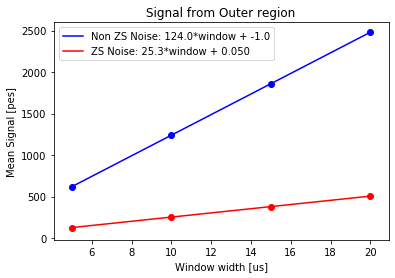

In [46]:
plt.scatter(window, noise, color='b')
plt.plot(window, a*window+b, color='b',label="Non ZS Noise: {:#.4g}*window + {:#.2}".format(a,b))

plt.scatter(window, zs_noise, color='r')
plt.plot(window, zs_a*window+zs_b, color='r',label="ZS Noise: {:#.3g}*window + {:#.2}".format(zs_a,zs_b))

plt.legend()
plt.xlabel('Window width [us]')
plt.ylabel('Mean Signal [pes]')
plt.title('Signal from Outer region')

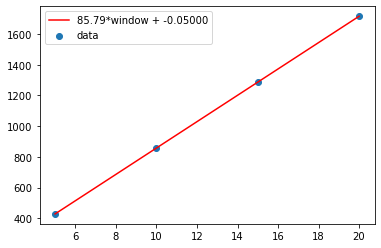

In [3]:
a, b = np.polyfit(window, noise_thresh5, 1)
plt.scatter(window, noise_thresh5, label='data')
plt.plot(window, a*window+b, color='r',label="{:#.4g}*window + {:#.4}".format(a,b))
plt.legend()

# Time dependence on noise (across the waveform)

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import tables as tb
import pandas as pd

#from invisible_cities.evm import pmaps
from invisible_cities.io import pmaps_io, dst_io
from invisible_cities.database.load_db  import DataPMT, DataSiPM
from invisible_cities.reco import xy_algorithms as xya
from invisible_cities.core import system_of_units as units
from invisible_cities.cities import components as cp

In [3]:
num_files = 2
run_number = 8088
num_plots = 3
data_dir = '../../data/trigger1/'+str(run_number)+'/waveforms/'
file_start = 'run_'+str(run_number)+'_000'
file_end = '_trigger1_waveforms.h5'
files = glob.glob(data_dir+'*.h5') #[data_dir+file_start+str(i)+file_end for i in range(0,num_files)]
files.sort()
dbfile = 'new'
s2_window = [798,808]
outer_window = [1000,1010]

In [4]:
files

['../../data/trigger1/8088/waveforms/run_8088_0000_trigger1_waveforms.h5',
 '../../data/trigger1/8088/waveforms/run_8088_0001_trigger1_waveforms.h5',
 '../../data/trigger1/8088/waveforms/run_8088_0929_trigger1_waveforms.h5',
 '../../data/trigger1/8088/waveforms/run_8088_2999_trigger1_waveforms.h5']

In [5]:
def GetCalibratedWaveforms(run_number, file_name):
    # Load the data into events array
    i = 0
    events = []
    wfs = cp.wf_from_files([file_name], cp.WfType.rwf)
    try:
        while wfs:
            thisdata = next(wfs)
            events.append(thisdata['sipm'])
            i += 1
    except StopIteration:
        pass
    finally:
        del wfs
    events = np.array(events)
    print('Number of Events: '+str(len(events)))

    # Calibrate data (set bad sipms to zero, converts to pes)
    cal_sipms = cp.calibrate_sipms(dbfile, run_number, 0)
    calibrated_sipms = np.array([cal_sipms(wfs) for wfs in events])

    return calibrated_sipms

def GetEvents(file_name):
    # Load the data into events array
    i = 0
    events = []
    wfs = cp.wf_from_files([file_name], cp.WfType.rwf)
    try:
        while wfs:
            thisdata = next(wfs)
            events.append(thisdata['sipm'])
            i += 1
    except StopIteration:
        pass
    finally:
        del wfs
    events = np.array(events)
    print('Number of Events: '+str(len(events)))
    
    return events

In [6]:
calibrated_sipms = GetCalibratedWaveforms(run_number, files[0])
calibrated_sipms_2 = GetCalibratedWaveforms(run_number, files[-1])

Number of Events: 156
Number of Events: 156


In [7]:
sipms_s2 = calibrated_sipms[:,:,s2_window[0]:s2_window[1]]
sipms_outer = calibrated_sipms[:,:,outer_window[0]:outer_window[1]]

sipms_s2_tsummed = np.sum(sipms_s2, axis=2)
sipms_outer_tsummed = np.sum(sipms_outer, axis=2)

In [8]:
mean_events_s2 = np.mean(sipms_s2, axis=0)
mean_events_outer = np.mean(sipms_outer, axis=0)

In [9]:
np.shape(mean_events_s2)

(1792, 10)

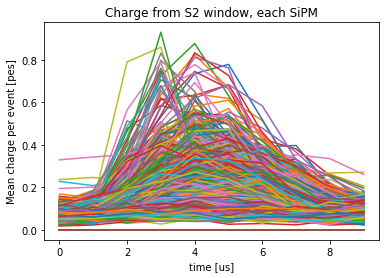

In [10]:
for sipm in range(len(mean_events_s2)):
    plt.plot(mean_events_s2[sipm])
plt.xlabel('time [us]')
plt.ylabel('Mean charge per event [pes]')
plt.title('Charge from S2 window, each SiPM')
plt.show()

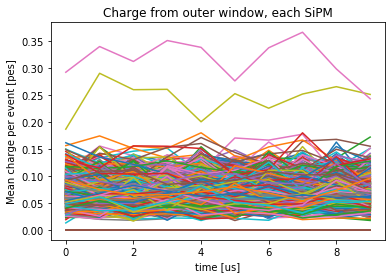

In [11]:
for sipm in range(len(mean_events_outer)):
    plt.plot(mean_events_outer[sipm])
plt.xlabel('time [us]')
plt.ylabel('Mean charge per event [pes]')
plt.title('Charge from outer window, each SiPM')
plt.show()

In [12]:
mean_signal_by_window = [np.mean(np.sum(np.sum(calibrated_sipms[:,:,i:i+10], axis=2), axis=1), axis=0) for i in range(len(calibrated_sipms[0,0,:])-10)]


In [13]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(0.5, 1.0, 'S2 region subtracted')

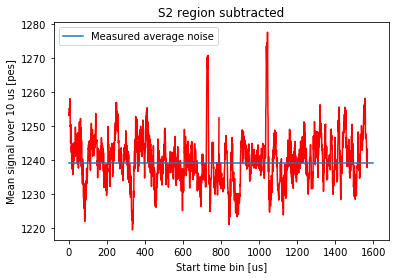

In [14]:
plt.plot(np.arange(len(mean_signal_by_window[0:790])), mean_signal_by_window[0:790], color='r')
plt.plot(np.arange(len(mean_signal_by_window[810:]))+len(mean_signal_by_window[0:790]), mean_signal_by_window[810:], color='r')
plt.plot([0,1600], [1239,1239], label='Measured average noise')
plt.xlabel('Start time bin [us]')
plt.ylabel('Mean signal over 10 us [pes]')
plt.legend()
plt.title('S2 region subtracted')

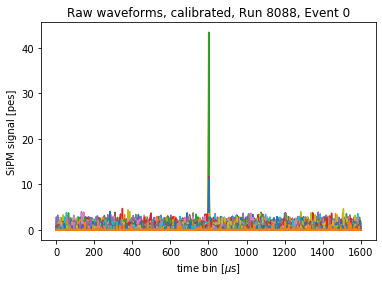

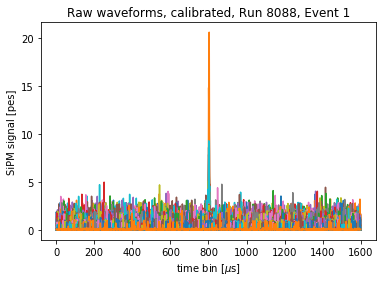

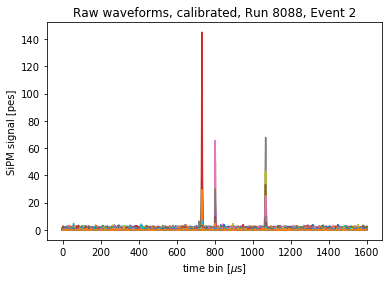

In [15]:
# Plotting a few raw waveforms, without any corrections
num_plots = 3
for event in range(0,num_plots):
    #summed_sipms = np.sum(events[event], axis=1)
    for sipm in calibrated_sipms[event]:
        plt.plot(sipm)
    plt.xlabel(r'time bin [$\mu$s]')
    plt.ylabel('SiPM signal [pes]')
    plt.title('Raw waveforms, calibrated, Run '+str(run_number)+', Event '+str(event))
    #plt.xlim(640,660)
    #plt.ylim(60000,100000)
    plt.show()

In [16]:
shape = np.shape(calibrated_sipms)
noise_mask = np.ones_like(calibrated_sipms, dtype=bool)
noise_mask[:,:,790:810] = False
noise = np.reshape(calibrated_sipms[noise_mask], (shape[0], shape[1], -1))

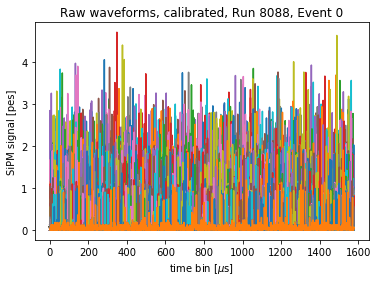

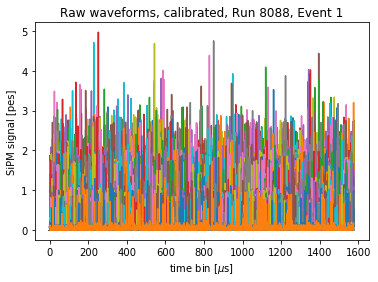

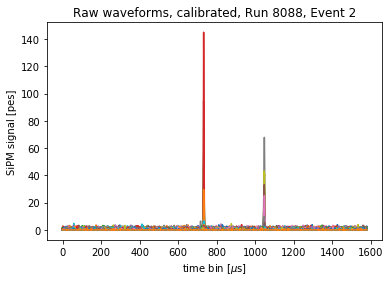

In [17]:
# Plotting a few raw waveforms, without any corrections
num_plots = 3
for event in range(0,num_plots):
    #summed_sipms = np.sum(events[event], axis=1)
    for sipm in noise[event]:
        plt.plot(sipm)
    plt.xlabel(r'time bin [$\mu$s]')
    plt.ylabel('SiPM signal [pes]')
    plt.title('Raw waveforms, calibrated, Run '+str(run_number)+', Event '+str(event))
    #plt.xlim(640,660)
    #plt.ylim(60000,100000)
    plt.show()

In [18]:
mean_noise_per_sipm = np.mean(np.mean(noise, axis=0), axis=1)

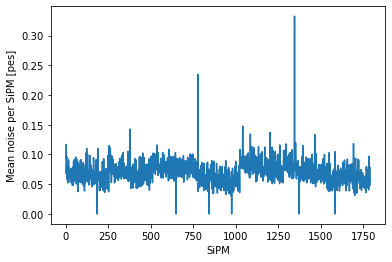

In [19]:
plt.plot(mean_noise_per_sipm)
plt.xlabel('SiPM')
plt.ylabel('Mean noise per SiPM [pes]')
plt.show()

In [20]:
noise_mask = np.ones_like(calibrated_sipms, dtype=bool)
noise_mask[:,:,790:810] = False

nsipms = 1792

#calibrated_sipms = GetCalibratedWaveforms(run_number, file)
shape = np.shape(calibrated_sipms)
noise = np.reshape(calibrated_sipms[noise_mask], (shape[0], shape[1], -1))

mean_noise_per_sipm = np.sum(np.sum(noise, axis=0), axis=1)
var_noise = np.var(np.var(noise, axis=0), axis=1)
ncounts = len(calibrated_sipms[:,0,0]) * len(calibrated_sipms[0,0,:])
    
mean_noise_per_sipm = mean_noise_per_sipm / ncounts

In [21]:
plt.rcParams.update({'font.size': 15})

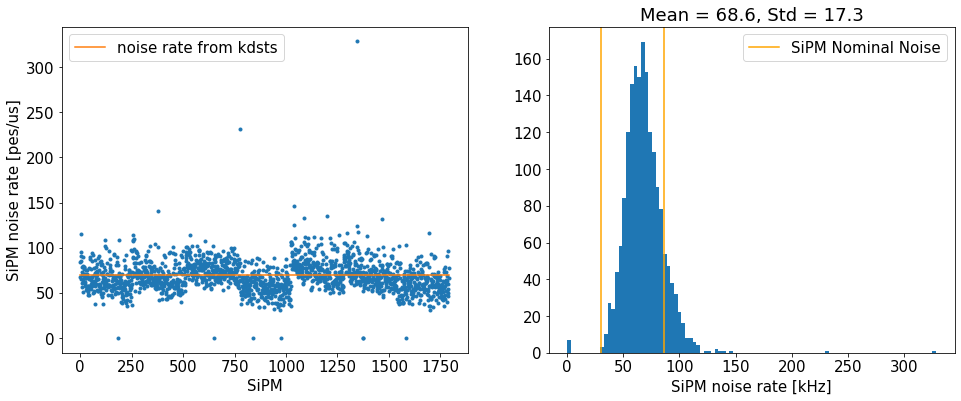

In [215]:
m_per_sipm = 124./1792.
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(mean_noise_per_sipm*1e3, '.')
plt.plot([0,1792], [m_per_sipm*1e3, m_per_sipm*1e3], label='noise rate from kdsts')
plt.legend()
plt.xlabel('SiPM')
plt.ylabel('SiPM noise rate [pes/us]')

plt.subplot(1,2,2)
plt.hist(mean_noise_per_sipm*1e3, bins=100)
#plt.axvline(x=m_per_sipm, ymin=0, ymax=160, color='orange', label='noise rate from kdsts')
#plt.legend()
plt.axvline(x=30, ymin=0, ymax=160, color='orange', label='SiPM Nominal Noise')
plt.axvline(x=86, ymin=0, ymax=160, color='orange')
plt.legend()
plt.plot()
plt.xlabel('SiPM noise rate [kHz]')
plt.title('Mean = {0:1.1f}, Std = {1:1.1f}'.format(np.mean(mean_noise_per_sipm[mean_noise_per_sipm>0])*1e3,np.std(mean_noise_per_sipm[mean_noise_per_sipm>0]*1e3)))
plt.savefig('/Users/taylorcontreras/Desktop/sipm_noise.png')


In [217]:
save_file = '/Users/taylorcontreras/Development/Research/nz_studies/data/sipm_noise.out'
np.savetxt(save_file, mean_noise_per_sipm, delimiter=',')

Text(0.5, 1.0, 'Ave std = 0.0209')

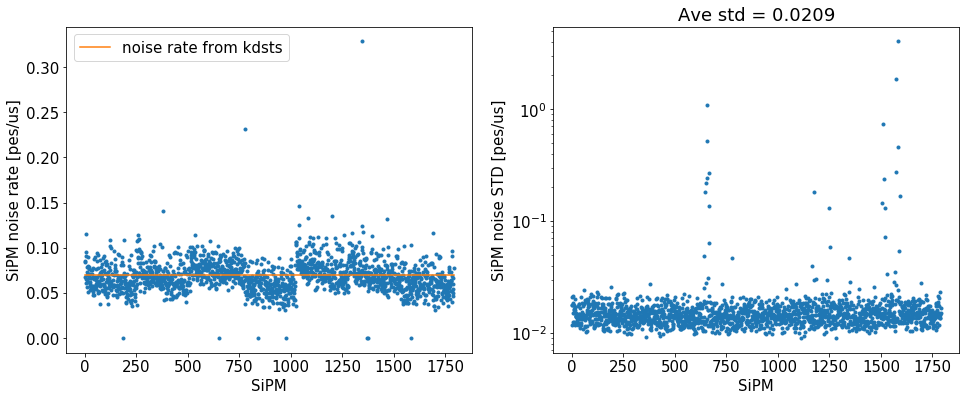

In [23]:
m_per_sipm = 124./1792.
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(mean_noise_per_sipm, '.')
plt.plot([0,1792], [m_per_sipm, m_per_sipm], label='noise rate from kdsts')
plt.legend()
plt.xlabel('SiPM')
plt.ylabel('SiPM noise rate [pes/us]')

plt.subplot(1,2,2)
plt.plot(np.sqrt(var_noise), '.')
plt.yscale('log')
plt.xlabel('SiPM')
plt.ylabel('SiPM noise STD [pes/us]')
plt.title('Ave std = {0:.3}'.format(np.mean(np.sqrt(var_noise))))

No handles with labels found to put in legend.


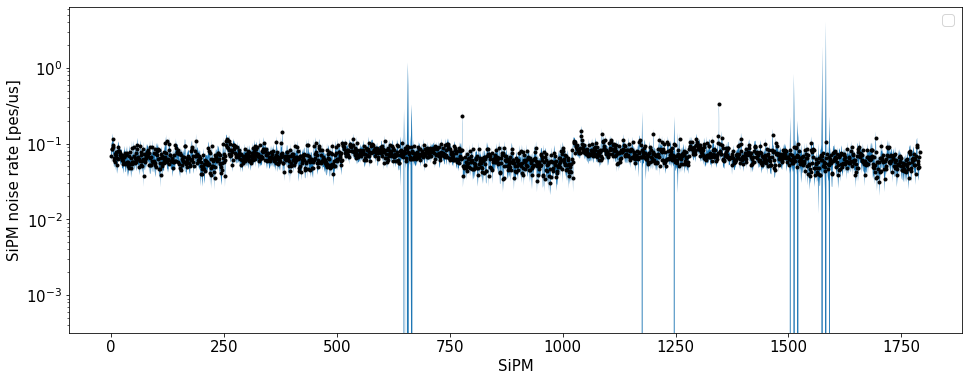

In [24]:
m_per_sipm = 124./1792.
plt.figure(figsize=(16, 6))
plt.fill_between(np.arange(1792), mean_noise_per_sipm-np.sqrt(var_noise), mean_noise_per_sipm+np.sqrt(var_noise))
plt.scatter(np.arange(1792), mean_noise_per_sipm, color='k', marker='.')#, yerr=np.sqrt(var_noise), marker='.', ecolor='black', label='data')
plt.legend()
plt.xlabel('SiPM')
plt.ylabel('SiPM noise rate [pes/us]')
plt.yscale('log')

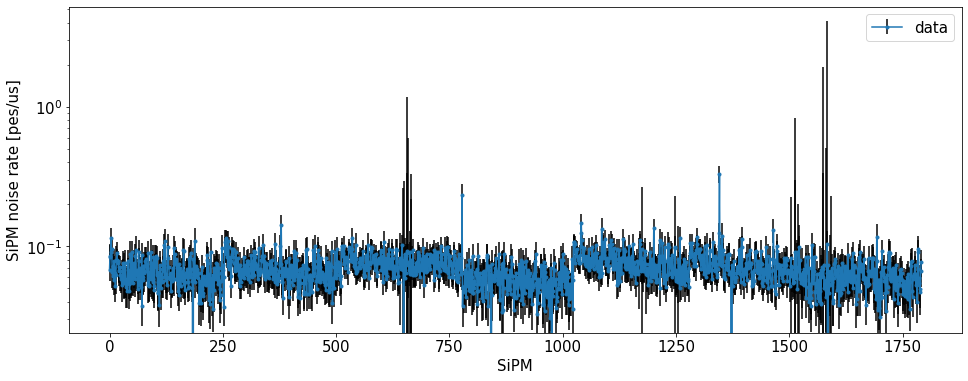

In [25]:
m_per_sipm = 124./1792.
plt.figure(figsize=(16, 6))
#plt.fill_between(np.arange(1792), mean_noise_per_sipm-np.sqrt(var_noise), mean_noise_per_sipm+np.sqrt(var_noise))
plt.errorbar(np.arange(1792), mean_noise_per_sipm, yerr=np.sqrt(var_noise), marker='.', ecolor='black', label='data')
plt.legend()
plt.xlabel('SiPM')
plt.ylabel('SiPM noise rate [pes/us]')
plt.yscale('log')

In [26]:
from invisible_cities.database import load_db
detector_db = 'new'
datasipm   = load_db.DataSiPM(detector_db, run_number)
sipm_xs    = datasipm.X.values
sipm_ys    = datasipm.Y.values
sipm_xys   = np.stack((sipm_xs, sipm_ys), axis=1)

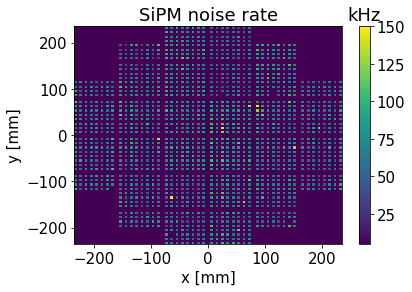

In [27]:
plt.hist2d(sipm_xys[:,0], sipm_xys[:,1], weights=mean_noise_per_sipm*1e3, bins=100, vmin=0.005*1e3, vmax=0.15*1e3)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.title('SiPM noise rate')
clb = plt.colorbar()
clb.ax.set_title('kHz')
plt.show()

In [28]:
bin_noise_rate = np.sum(np.sum(noise, axis=0), axis=0) / (np.shape(noise)[0] * np.shape(noise)[1])

In [29]:
shape = np.shape(noise)
time_noise = noise.reshape(-1,shape[-1])
bin_var_rate = np.var(time_noise, axis=0)

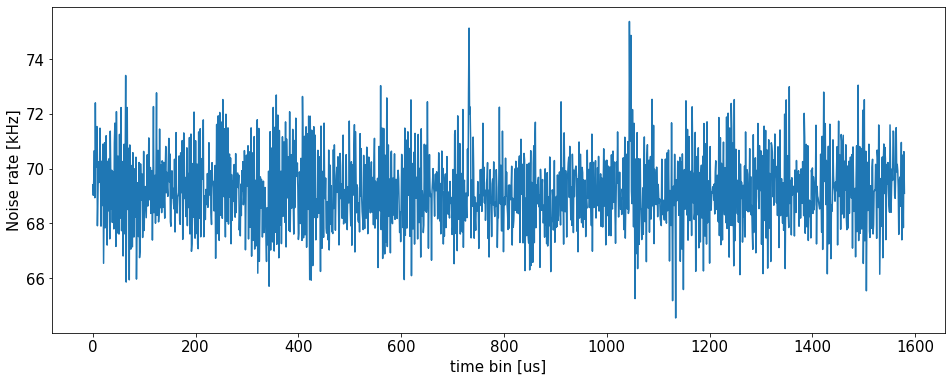

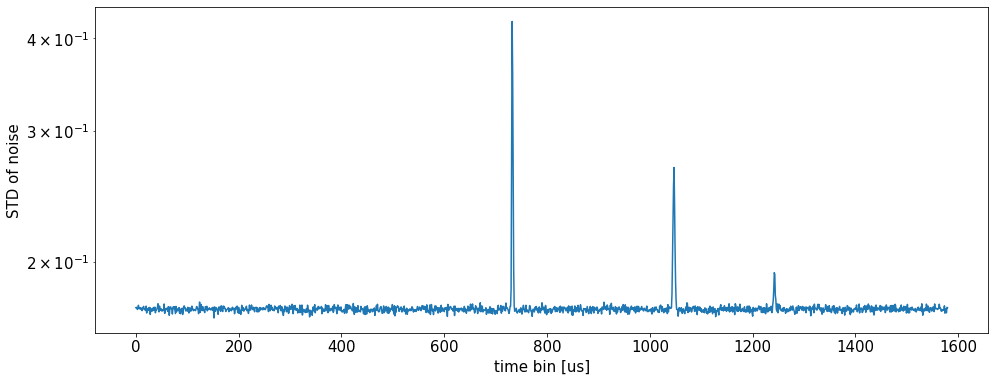

In [30]:
plt.figure(figsize=(16, 6))
plt.plot(bin_noise_rate*1e3)
plt.xlabel('time bin [us]')
plt.ylabel('Noise rate [kHz]')
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(np.sqrt(bin_var_rate))
plt.xlabel('time bin [us]')
plt.ylabel('STD of noise')
plt.yscale('log')
plt.show()

In [31]:
sipm_noise = np.mean(noise, axis=2)
var = np.var(noise, axis=2)

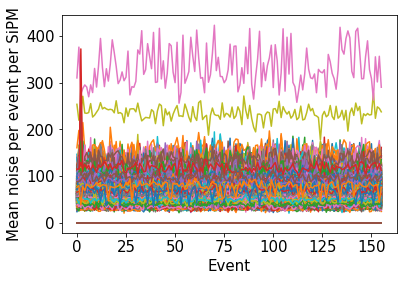

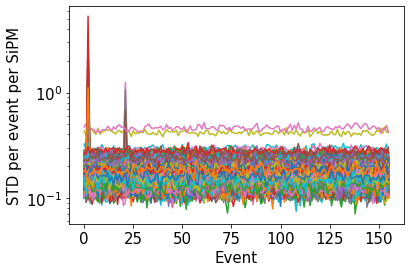

In [32]:
nsipms = 1792
for sipm in range(0,nsipms):
    plt.plot(sipm_noise[:,sipm]*1e3)
plt.xlabel('Event')
plt.ylabel('Mean noise per event per SiPM')
plt.show()

nsipms = 1792
for sipm in range(0,nsipms):
    plt.plot(np.sqrt(var[:,sipm]))
plt.xlabel('Event')
plt.ylabel('STD per event per SiPM')
plt.yscale('log')
plt.show()

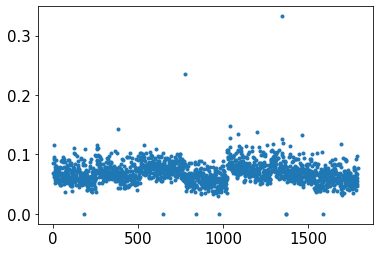

In [33]:
sipms_noise = np.mean(np.mean(noise, axis=2), axis=0)
plt.plot(sipms_noise, '.')

In [34]:
bad_sipms = np.argwhere(sipms_noise > 0.2)

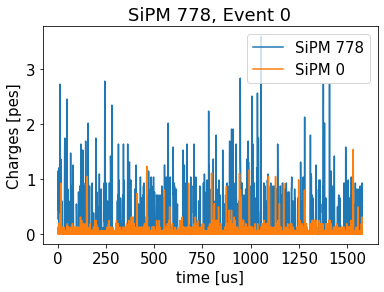

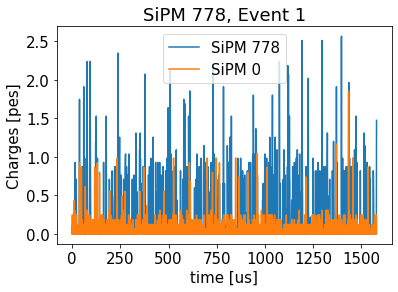

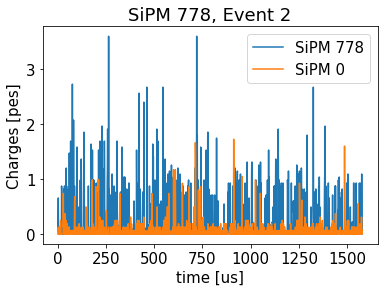

In [35]:
this_sipm = bad_sipms[0][0]
nplots = 3
for i in range(nplots):
    plt.plot(noise[i,this_sipm,:], label='SiPM '+str(this_sipm))
    plt.plot(noise[i,0,:], label='SiPM 0')
    plt.xlabel('time [us]')
    plt.ylabel('Charges [pes]')
    plt.title('SiPM '+str(this_sipm)+', Event '+str(i))
    plt.legend()
    plt.show()

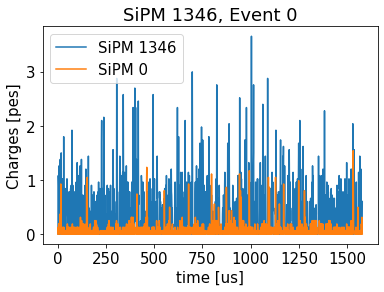

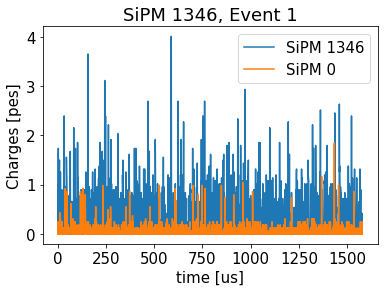

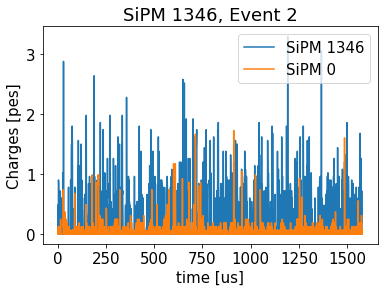

In [36]:
this_sipm = bad_sipms[1][0]
nplots = 3
for i in range(nplots):
    plt.plot(noise[i,this_sipm,:], label='SiPM '+str(this_sipm))
    plt.plot(noise[i,0,:], label='SiPM 0')
    plt.xlabel('time [us]')
    plt.ylabel('Charges [pes]')
    plt.title('SiPM '+str(this_sipm)+', Event '+str(i))
    plt.legend()
    plt.show()

## Comparing with end of run

In [38]:
shape = np.shape(calibrated_sipms_2)
noise_2 = np.reshape(calibrated_sipms_2[noise_mask], (shape[0], shape[1], -1))

mean_noise_per_sipm_2 = np.sum(np.sum(noise_2, axis=0), axis=1)
var_noise_2 = np.var(np.var(noise_2, axis=0), axis=1)
ncounts = len(calibrated_sipms_2[:,0,0]) * len(calibrated_sipms_2[0,0,:])
    
mean_noise_per_sipm_2 = mean_noise_per_sipm_2 / ncounts

Text(0.5, 1.0, 'File 2999, Std = 0.017')

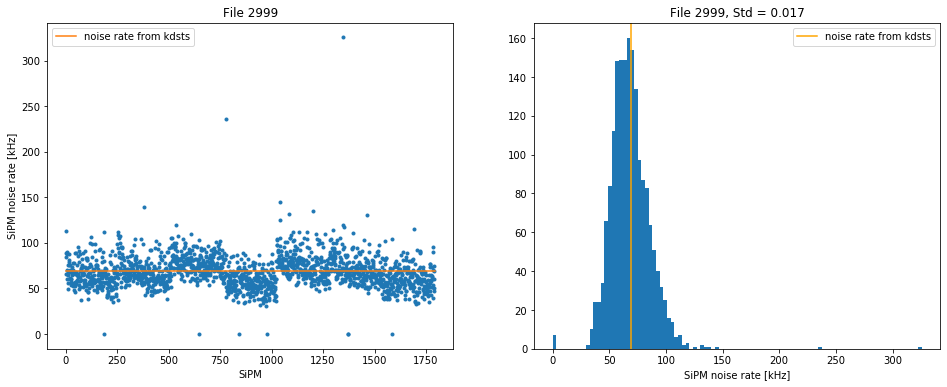

In [39]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(mean_noise_per_sipm_2*1e3, '.')
plt.plot([0,1792], [m_per_sipm*1e3, m_per_sipm*1e3], label='noise rate from kdsts')
plt.legend()
plt.title('File 2999')
plt.xlabel('SiPM')
plt.ylabel('SiPM noise rate [kHz]')

plt.subplot(1,2,2)
plt.hist(mean_noise_per_sipm_2*1e3, bins=100)
plt.axvline(x=m_per_sipm*1e3, ymin=0, ymax=160, color='orange', label='noise rate from kdsts')
plt.legend()
plt.plot()
plt.xlabel('SiPM noise rate [kHz]')
plt.title('File 2999, Std = {0:.2}'.format(np.std(mean_noise_per_sipm_2[mean_noise_per_sipm_2>0])))

Text(0.5, 1.0, 'File 2999, Ave std = 0.0275')

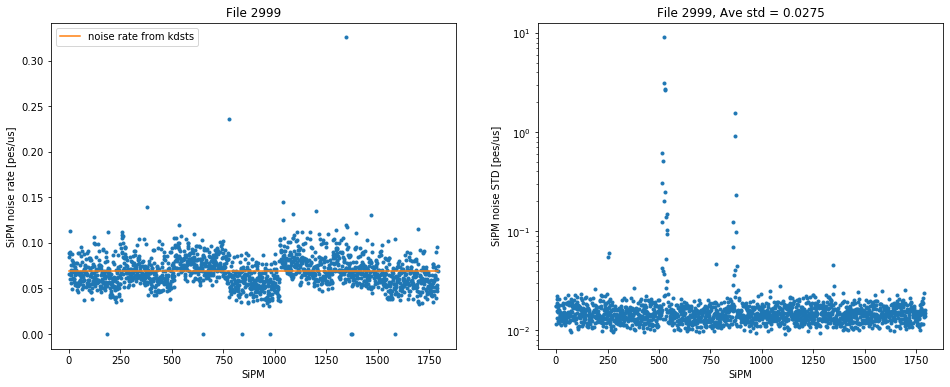

In [40]:
m_per_sipm = 124./1792.
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(mean_noise_per_sipm_2, '.')
plt.plot([0,1792], [m_per_sipm, m_per_sipm], label='noise rate from kdsts')
plt.legend()
plt.xlabel('SiPM')
plt.ylabel('SiPM noise rate [pes/us]')
plt.title('File 2999')

plt.subplot(1,2,2)
plt.plot(np.sqrt(var_noise_2), '.')
plt.yscale('log')
plt.xlabel('SiPM')
plt.ylabel('SiPM noise STD [pes/us]')
plt.title('File 2999, Ave std = {0:.3}'.format(np.mean(np.sqrt(var_noise_2))))

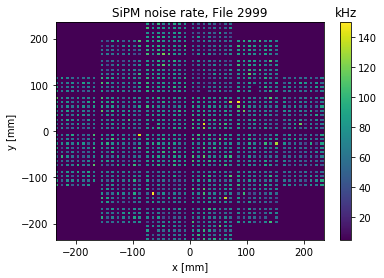

In [41]:
plt.hist2d(sipm_xys[:,0], sipm_xys[:,1], weights=mean_noise_per_sipm_2*1e3, bins=100, vmin=0.005*1e3, vmax=0.15*1e3)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.title('SiPM noise rate, File 2999')
clb = plt.colorbar()
clb.ax.set_title('kHz')
plt.show()

In [42]:
bin_noise_rate_2 = np.sum(np.sum(noise_2, axis=0), axis=0) / (np.shape(noise_2)[0] * np.shape(noise_2)[1])

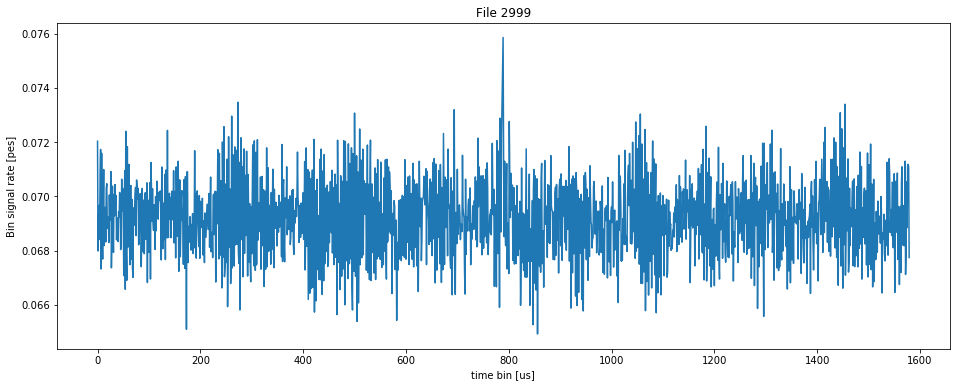

In [43]:
plt.figure(figsize=(16, 6))
plt.plot(bin_noise_rate_2)
plt.xlabel('time bin [us]')
plt.ylabel('Bin signal rate [pes]')
plt.title('File 2999')
plt.show()

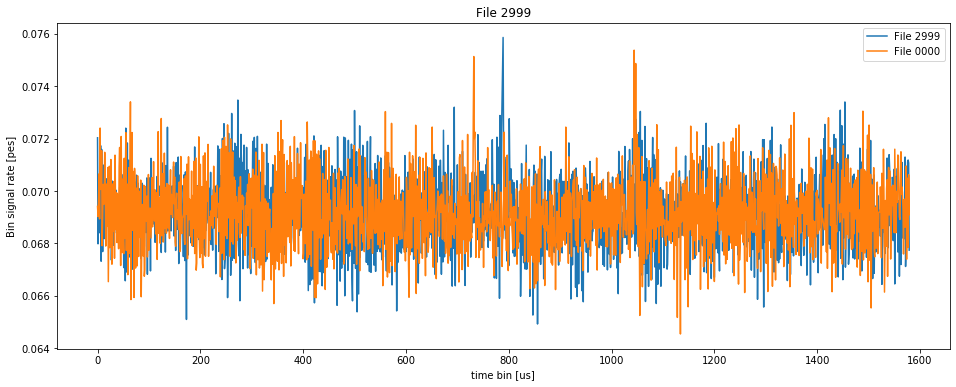

In [44]:
plt.figure(figsize=(16, 6))
plt.plot(bin_noise_rate_2, label='File 2999')
plt.plot(bin_noise_rate, label='File 0000')
plt.xlabel('time bin [us]')
plt.ylabel('Bin signal rate [pes]')
plt.title('File 2999')
plt.legend()
plt.show()

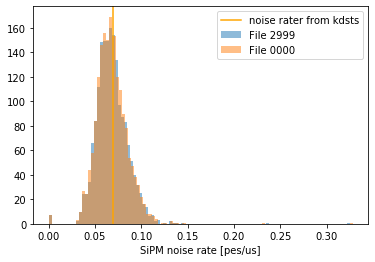

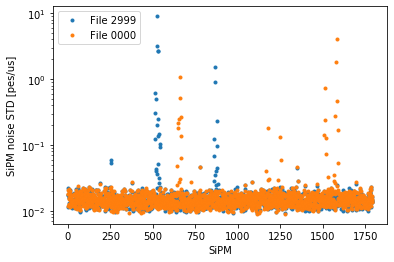

In [81]:
plt.hist(mean_noise_per_sipm_2, bins=100, label='File 2999', alpha=0.5)
plt.hist(mean_noise_per_sipm, bins=100, label='File 0000', alpha=0.5)
plt.axvline(x=m_per_sipm, ymin=0, ymax=160, color='orange', label='noise rater from kdsts')
plt.legend()
plt.xlabel('SiPM noise rate [pes/us]')
plt.show()

plt.plot(np.sqrt(var_noise_2), '.', label='File 2999')
plt.plot(np.sqrt(var_noise), '.', label='File 0000')
plt.yscale('log')
plt.xlabel('SiPM')
plt.ylabel('SiPM noise STD [pes/us]')
plt.legend()
#plt.ylim(0.02,10)
plt.show()

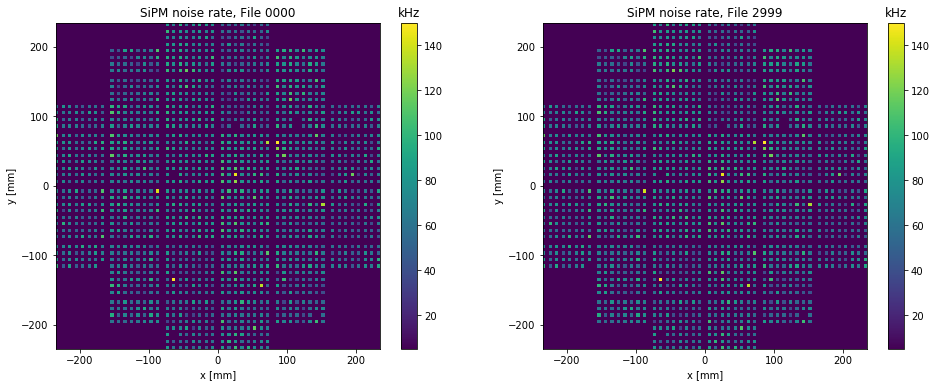

In [46]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.hist2d(sipm_xys[:,0], sipm_xys[:,1], weights=mean_noise_per_sipm*1e3, bins=100, vmin=0.005*1e3, vmax=0.15*1e3)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.title('SiPM noise rate, File 0000')
clb = plt.colorbar()
clb.ax.set_title('kHz')

plt.subplot(1,2,2)
plt.hist2d(sipm_xys[:,0], sipm_xys[:,1], weights=mean_noise_per_sipm_2*1e3, bins=100, vmin=0.005*1e3, vmax=0.15*1e3)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.title('SiPM noise rate, File 2999')
clb = plt.colorbar()
clb.ax.set_title('kHz')
plt.show()

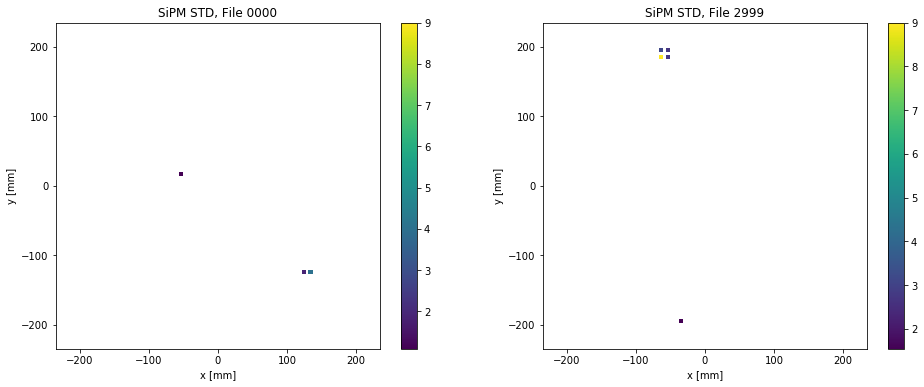

In [47]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.hist2d(sipm_xys[:,0], sipm_xys[:,1], weights=np.sqrt(var_noise), bins=100, vmax=9, cmin=1)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.title('SiPM STD, File 0000')
clb = plt.colorbar()
#clb.ax.set_title('kHz')

plt.subplot(1,2,2)
plt.hist2d(sipm_xys[:,0], sipm_xys[:,1], weights=np.sqrt(var_noise_2), bins=100, vmax=9, cmin=1)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.title('SiPM STD, File 2999')
clb = plt.colorbar()
#clb.ax.set_title('kHz')
plt.show()

In [48]:
sipm_noise_2 = np.mean(noise_2, axis=2)
var_2 = np.var(noise_2, axis=2)

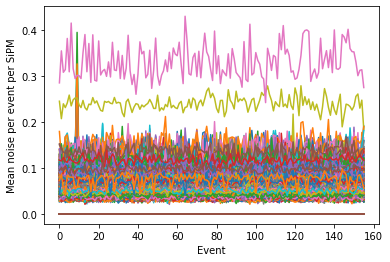

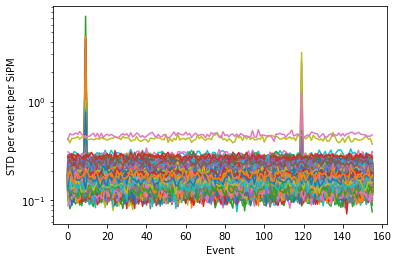

In [51]:
nsipms = 1792
for sipm in range(0,nsipms):
    plt.plot(sipm_noise_2[:,sipm])
plt.xlabel('Event')
plt.ylabel('Mean noise per event per SiPM')
plt.show()

nsipms = 1792
for sipm in range(0,nsipms):
    plt.plot(np.sqrt(var_2[:,sipm]))
plt.xlabel('Event')
plt.ylabel('STD per event per SiPM')
plt.yscale('log')
plt.show()

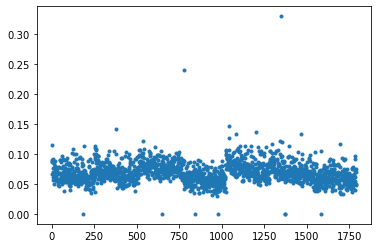

In [74]:
sipms_noise_2 = np.mean(np.mean(noise_2, axis=2), axis=0)
plt.plot(sipms_noise_2, '.')

In [75]:
bad_sipms = np.argwhere(sipms_noise > 0.2)

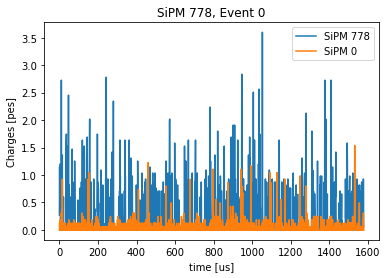

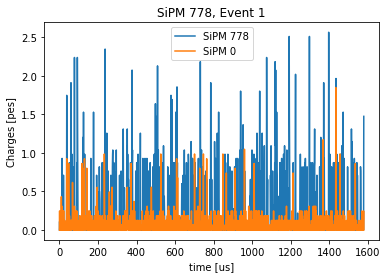

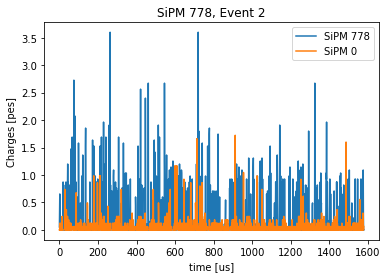

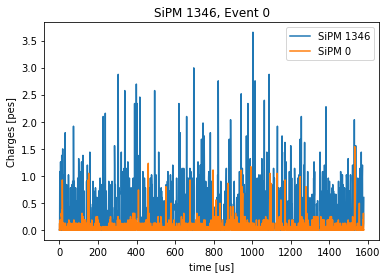

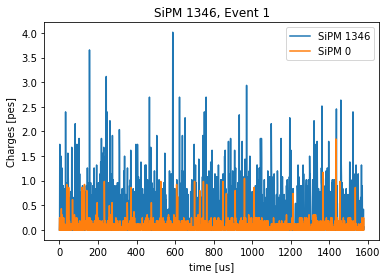

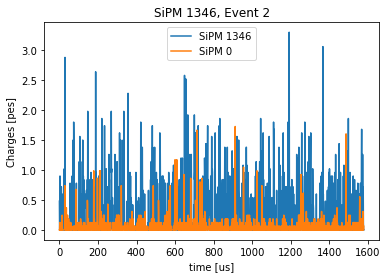

In [76]:
nplots = 3
for this_sipm in bad_sipms[:,0]:
    for i in range(nplots):
        plt.plot(noise[i,this_sipm,:], label='SiPM '+str(this_sipm))
        plt.plot(noise[i,0,:], label='SiPM 0')
        plt.xlabel('time [us]')
        plt.ylabel('Charges [pes]')
        plt.title('SiPM '+str(this_sipm)+', Event '+str(i))
        plt.legend()
        plt.show()

# Testing dark expectation from IC

In [2]:
from invisible_cities.core.random_sampling import NoiseSampler

In [3]:
dbfile = 'new'
run_number = 8088
NS = NoiseSampler(dbfile, run_number)

In [4]:
de = NS.dark_expectation(sample_width=1, dark_model=None)

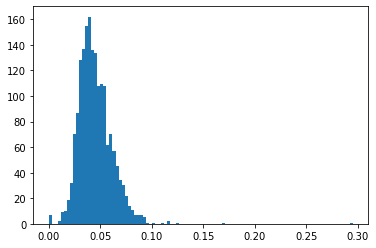

In [5]:
plt.hist(de, bins=100, label='Dark Expection')
plt.show()

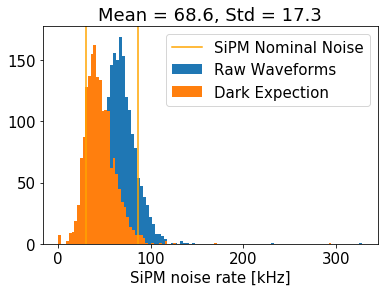

In [54]:
plt.hist(mean_noise_per_sipm*1e3, bins=100, label='Raw Waveforms')
plt.hist(de*1e3, bins=100, label='Dark Expection')
plt.axvline(x=30, ymin=0, ymax=160, color='orange', label='SiPM Nominal Noise')
plt.axvline(x=86, ymin=0, ymax=160, color='orange')
plt.legend()
plt.xlabel('SiPM noise rate [kHz]')
plt.title('Mean = {0:1.1f}, Std = {1:1.1f}'.format(np.mean(mean_noise_per_sipm[mean_noise_per_sipm>0])*1e3,np.std(mean_noise_per_sipm[mean_noise_per_sipm>0]*1e3)))
plt.show()

In [9]:
de_thresh = NS.dark_expectation(sample_width=10)

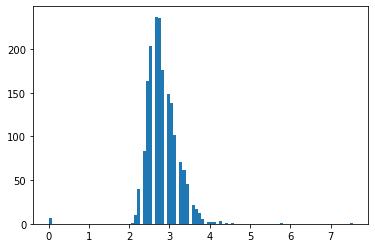

In [10]:
plt.hist(de_thresh, bins=100, label='Dark Expection')
plt.show()

# Noise as Poisson Stats

In [24]:
counts = calibrated_sipms[noise_mask]
count.flatten()

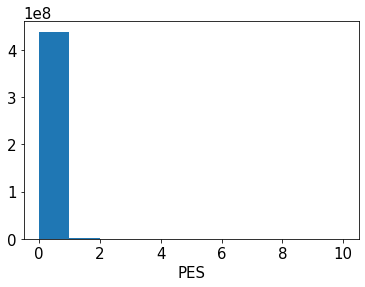

In [25]:
plt.hist(counts, bins=10, range=(0,10))
plt.xlabel('PES')
plt.show()

In [172]:
width = 10
this_noise = calibrated_sipms[noise_mask]

In [35]:
np.shape(this_noise)

(441692160,)

In [28]:
np.shape(noise_mask)

(156, 1792, 1600)

In [34]:
np.reshape(this_noise, np.shape(calibrated_sipms[noise_mask]))

array([0.        , 0.12310495, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [173]:
shape = np.shape(calibrated_sipms)
noise = np.reshape(calibrated_sipms[noise_mask], (shape[0], shape[1], -1))

In [39]:
this_sipm = noise[0,0,:]

In [82]:
np.shape(this_sipm)

(1580,)

In [132]:
this_sipm[...,0]

array(0.)

In [84]:
np.shape(this_sipm[0:-1] + this_sipm[1:None])

(1579,)

In [133]:
def Slice(this_sipm, width, i):
    this_slice = (i,-(width-i-1))
    if this_slice[-1] == 0:
        return this_sipm[...,this_slice[0]:]
    else:
        return this_sipm[...,this_slice[0]:this_slice[1]]

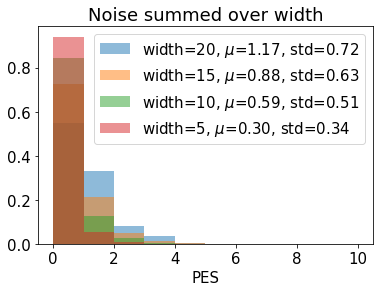

In [134]:
widths = [20, 15, 10, 5]
means = []
for width in widths:
    this_noise = np.sum(np.array([Slice(this_sipm, width, i) for i in range(width)]), axis=0)
    mu = np.mean(this_noise)
    std = np.std(this_noise)
    plt.hist(this_noise, bins=10, range=(0,10), alpha=0.5, density=True,
             label=f'width={width:.0f}, $\mu$={mu:.2f}, std={std:.2f}')
    means.append(mu)
plt.xlabel('PES')
plt.title('Noise summed over width')
plt.legend()
plt.show()

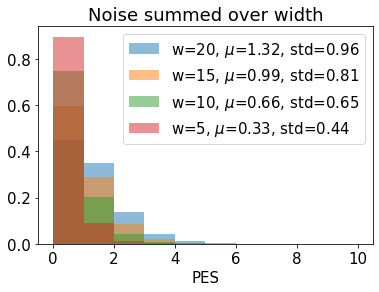

In [174]:
widths = [20, 15, 10, 5]
means = []
for width in widths:
    this_noise = np.sum(np.array([Slice(noise[0,:,:], width, i) for i in range(width)]), axis=0)
    mu = np.mean(this_noise)
    std = np.std(this_noise)
    var = np.var(this_noise)
    plt.hist(this_noise.flatten(), bins=10, range=(0,10), alpha=0.5, density=True,
             label=f'w={width:.0f}, $\mu$={mu:.2f}, std={std:.2f}')
    means.append(mu)
plt.xlabel('PES')
plt.title('Noise summed over width')
plt.legend()
plt.show()

# Thresholding

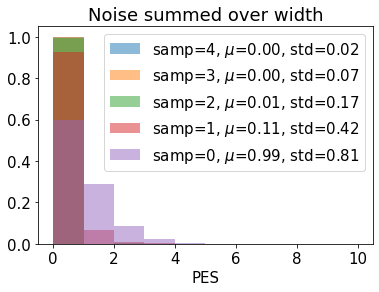

In [181]:
samp_thresholds = [4,3,2,1,0]
int_threshold = 0
width = 15
means = []
for samp_thresh in samp_thresholds:
    this_noise = np.copy(noise[0])
    this_noise[this_noise < samp_thresh] = 0
    
    this_int = np.sum(np.array([Slice(this_noise, width, i) for i in range(width)]), axis=0) # (events, SiPMs)
    this_int[this_int < int_threshold] = 0
    mu = np.mean(this_int)
    var = np.var(this_int)
    std = np.std(this_int)
    
    plt.hist(this_int.flatten(), bins=10, range=(0,10), alpha=0.5, density=True,
             label=f'samp={samp_thresh:.0f}, $\mu$={mu:.2f}, std={std:.2f}')
    means.append(mu)
plt.xlabel('PES')
plt.title('Noise summed over width')
plt.legend()
plt.show()

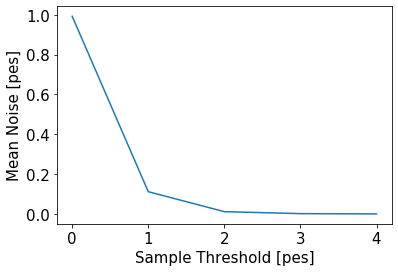

In [182]:
plt.plot(samp_thresholds, means)
plt.xlabel('Sample Threshold [pes]')
plt.ylabel('Mean Noise [pes]')
plt.show()

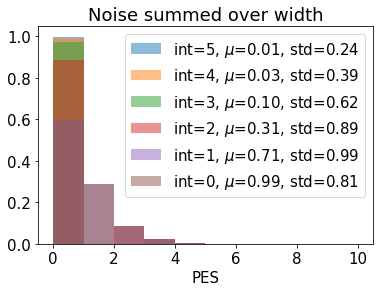

In [185]:
samp_threshold = 0
int_thresholds = [5, 4, 3, 2, 1, 0]
width = 15
means = []
for int_thresh in int_thresholds:
    this_noise = np.copy(noise[0])
    this_noise[this_noise < samp_threshold] = 0
    
    this_int = np.sum(np.array([Slice(this_noise, width, i) for i in range(width)]), axis=0) # (events, SiPMs)
    this_int[this_int < int_thresh] = 0
    mu = np.mean(this_int)
    var = np.var(this_int)
    std = np.std(this_int)
    
    plt.hist(this_int.flatten(), bins=10, range=(0,10), alpha=0.5, density=True,
             label=f'int={int_thresh:.0f}, $\mu$={mu:.2f}, std={std:.2f}')
    means.append(mu)
plt.xlabel('PES')
plt.title('Noise summed over width')
plt.legend()
plt.show()

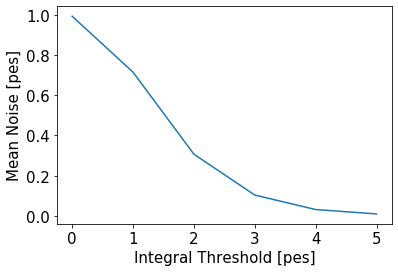

In [186]:
plt.plot(int_thresholds, means)
plt.xlabel('Integral Threshold [pes]')
plt.ylabel('Mean Noise [pes]')
plt.show()

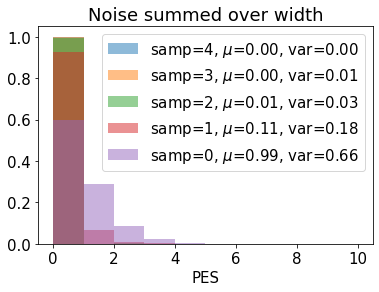

In [191]:
samp_thresholds = [4,3,2,1,0]
int_threshold = 0
width = 15
means = []
nevents = 10
for samp_thresh in samp_thresholds:
    mus = []
    variances = []
    nbins = []
    for evt in range(nevents):
        this_noise = np.copy(noise[0])
        this_noise[this_noise < samp_thresh] = 0

        this_int = np.sum(np.array([Slice(this_noise, width, i) for i in range(width)]), axis=0) # (events, SiPMs)
        this_int[this_int < int_threshold] = 0
        mu = np.mean(this_int)
        var = np.var(this_int)
        mus.append(mu)
        variances.append(var)
        nbins.append(len(this_int.flatten()))
    mus = np.array(mus)
    variances = np.array(variances)
    nbins = np.array(nbins)
    N = np.sum(nbins)
    mu = np.sum(mus * nbins) / N
    var = (np.sum(nbins * (mus - mu)) + np.sum(nbins*variances)) / N
    
    plt.hist(this_int.flatten(), bins=10, range=(0,10), alpha=0.5, density=True,
             label=f'samp={samp_thresh:.0f}, $\mu$={mu:.2f}, var={var:.2f}')
    means.append(mu)
plt.xlabel('PES')
plt.title('Noise summed over width')
plt.legend()
plt.show()

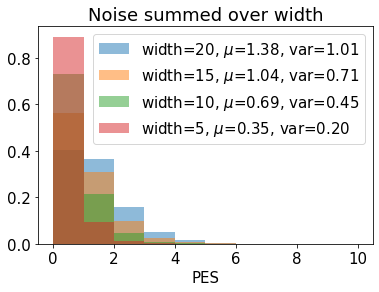

In [206]:
samp_thresholds = [4,3,2,1,0]
int_threshold = 0
samp_threshold = 0
widths = [20,15, 10, 5]
means = []
nevents = len(noise[:,0,0])
for width in widths:
    mus = []
    variances = []
    nbins = []
    for evt in range(nevents):
        this_noise = np.copy(noise[evt])
        this_noise[this_noise < samp_threshold] = 0

        this_int = np.sum(np.array([Slice(this_noise, width, i) for i in range(width)]), axis=0) # (events, SiPMs)
        this_int[this_int < int_threshold] = 0
        mu = np.mean(this_int)
        var = np.var(this_int)
        mus.append(mu)
        variances.append(var)
        nbins.append(len(this_int.flatten()))
    mus = np.array(mus)
    variances = np.array(variances)
    nbins = np.array(nbins)
    N = np.sum(nbins)
    mu = np.sum(mus * nbins) / N
    var = (np.sum(nbins * (mus - mu)) + np.sum(nbins*variances)) / N
    
    plt.hist(this_int.flatten(), bins=10, range=(0,10), alpha=0.5, density=True,
             label=f'width={width:.0f}, $\mu$={mu:.2f}, var={var:.2f}')
    means.append(mu)
plt.xlabel('PES')
plt.title('Noise summed over width')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Signal from Outer region')

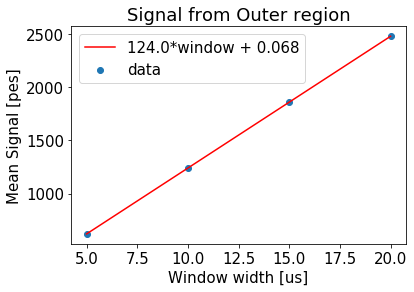

In [207]:
widths = np.array(widths)
means = np.array(means) * 1792
a, b = np.polyfit(widths, means, 1)
plt.scatter(widths, means, label='data')
plt.plot(widths, a*widths+b, color='r',label="{:#.4g}*window + {:#.2}".format(a,b))
plt.legend()
plt.xlabel('Window width [us]')
plt.ylabel('Mean Signal [pes]')
plt.title('Signal from Outer region')

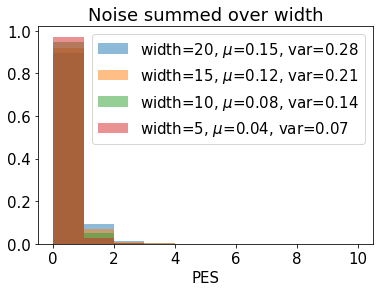

In [210]:
samp_thresholds = [4,3,2,1,0]
int_threshold = 0
samp_threshold = 1
widths = [20,15, 10, 5]
means = []
nevents = len(noise[:,0,0])
for width in widths:
    mus = []
    variances = []
    nbins = []
    for evt in range(nevents):
        this_noise = np.copy(noise[evt])
        this_noise[this_noise < samp_threshold] = 0

        this_int = np.sum(np.array([Slice(this_noise, width, i) for i in range(width)]), axis=0) # (events, SiPMs)
        this_int[this_int < int_threshold] = 0
        mu = np.mean(this_int)
        var = np.var(this_int)
        mus.append(mu)
        variances.append(var)
        nbins.append(len(this_int.flatten()))
    mus = np.array(mus)
    variances = np.array(variances)
    nbins = np.array(nbins)
    N = np.sum(nbins)
    mu = np.sum(mus * nbins) / N
    var = (np.sum(nbins * (mus - mu)) + np.sum(nbins*variances)) / N
    
    plt.hist(this_int.flatten(), bins=10, range=(0,10), alpha=0.5, density=True,
             label=f'width={width:.0f}, $\mu$={mu:.2f}, var={var:.2f}')
    means.append(mu)
plt.xlabel('PES')
plt.title('Noise summed over width')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Signal from Outer region')

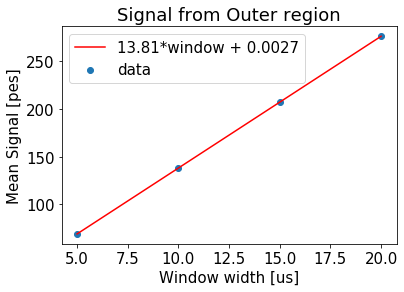

In [211]:
widths = np.array(widths)
means = np.array(means) * 1792
a, b = np.polyfit(widths, means, 1)
plt.scatter(widths, means, label='data')
plt.plot(widths, a*widths+b, color='r',label="{:#.4g}*window + {:#.2}".format(a,b))
plt.legend()
plt.xlabel('Window width [us]')
plt.ylabel('Mean Signal [pes]')
plt.title('Signal from Outer region')

In [214]:
rates = []
for thresh in thresholds:
    samp_thresh = thresh[0]
    int_thresh = thresh[1]
    widths = [20,15, 10, 5]
    means = []
    nevents = len(noise[:,0,0])
    for width in widths:
        mus = []
        variances = []
        nbins = []
        for evt in range(nevents):
            this_noise = np.copy(noise[evt])
            this_noise[this_noise < samp_thresh] = 0

            this_int = np.sum(np.array([Slice(this_noise, width, i) for i in range(width)]), axis=0) # (events, SiPMs)
            this_int[this_int < int_thresh] = 0
            mu = np.mean(this_int)
            var = np.var(this_int)
            mus.append(mu)
            variances.append(var)
            nbins.append(len(this_int.flatten()))
        mus = np.array(mus)
        variances = np.array(variances)
        nbins = np.array(nbins)
        N = np.sum(nbins)
        mu = np.sum(mus * nbins) / N
        var = (np.sum(nbins * (mus - mu)) + np.sum(nbins*variances)) / N
        means.append(mu)
    rate = np.mean(means * 1e3)
    rates.append(rate)


array([7.70840573, 7.70851279, 7.70851885, 7.70859754])

# Compare 'bad sipms' between my analysis and calibration

In [17]:
events = GetEvents(files[0])

Number of Events: 156


In [18]:
calib = cp.calibrate_sipms(dbfile, run_number, 0)
cal_sipms = np.array([calib(wfs) for wfs in events])

In [19]:
np.shape(cal_sipms)

(156, 1792, 1600)

In [20]:
sum_all_events = np.sum(np.sum(cal_sipms, axis=2), axis=0)

In [25]:
bad_sipms = np.where(sum_all_events > 0, np.zeros_like(sum_all_events),  np.arange(len(sum_all_events))+1)

In [27]:
bad_sipms = bad_sipms[bad_sipms>0]

In [32]:
np.array(worst_sipms)+1

array([185, 650])

In [29]:
bad_sipms

array([ 185.,  650.,  843.,  977., 1373., 1374., 1586.])

In [174]:
datasipm

,SensorID,ChannelID,Active,X,Y,adc_to_pes,Sigma
0,1000,1013,1,-235.0,45.0,16.2463,1.58694
1,1001,1012,1,-235.0,55.0,16.6002,2.44081
2,1002,1015,1,-235.0,65.0,16.8977,2.44031
3,1003,1014,1,-235.0,75.0,16.3651,1.91957
4,1004,1029,1,-235.0,85.0,15.6904,2.15698
...,...,...,...,...,...,...,...
1787,28059,28054,1,235.0,-85.0,16.6143,2.50000
1788,28060,28037,1,235.0,-75.0,16.0954,2.50000
1789,28061,28036,1,235.0,-65.0,17.7914,2.50000
1790,28062,28039,1,235.0,-55.0,16.2319,2.46978
